# Design Principles Underlying Design Patterns

## Liskov Substitution Principle

- The qn this is trying to answer is: Is it appropriate to use inheritance of classes? Reminder, inheritance exists when the base class is more general than its child class. 

- LSP states that if class S is a subtype of class B, then S must be able to substitute all instances of B without changing the behaviours of a program

- Some constraints imposed by LSP
    - Conditions imposed by the baseclass over the invocation of specific methods should not be "strengthened" by a subclass. 
        - If it is, consider using composition instead to modify the base class
    - State of program after method execution cannot be "weakened" by a subclass, but can be strengthened
        - If I set an alarm for June, my sub class cannot weaken that to have an alarm for every month Jan-Dec
        - BUT it can set an alarm to June 1st
    - Invariant conditions in the base class must also be invariant in the subclass. This is obvious if your subclass needs to be substitutable with your base class
    - Immutable characteristics of a base class must not be changed by the subclass. Again, it is probably obvious if you simply expect the subclass to be freely substitutable with the base class


## Open/Closed Principle

- OCP: Classes should be open for extension but closed to change
    - Keep stable part of your system separate from the varying parts through use of inheritance or interfaces

- A class is "closed" to editing once it has been
    - Tested
    - All attributes and behaviours are encapsulated
    - Proven stable within your system

- Even if a class is "closed", it can still be "open" to extension. 2 ways to extend class using open principle:
    - Inheritance, to extend superclass
    - Abstract superclass, so your implementation of the methods can be defined in the subclasses (interface)

## Dependency Inversion Principle

- Common problem in designing large systems is dependency
    - Where are the dependencies?
    - To what degree is my system/subsystem dependent on a particular resource?

- Software dependency is "coupling". If software is "coupled", then dependency between them is high

- DIP: High level modules should depend on high level generalisations, not on low level details
    - So your client classes should depend on `interfaces` and `abstract classes`, rather than concrete classes
    - Change referencing of concrete classes to indirect references
    - Generalise behaviours of concrete classes to abstract classes and interfaces
    - Have client classes interact with system through generalisation instead of concrete resources
    - high level dependency >> low level dependency

- Low vs High level dependency
    - Low
    - 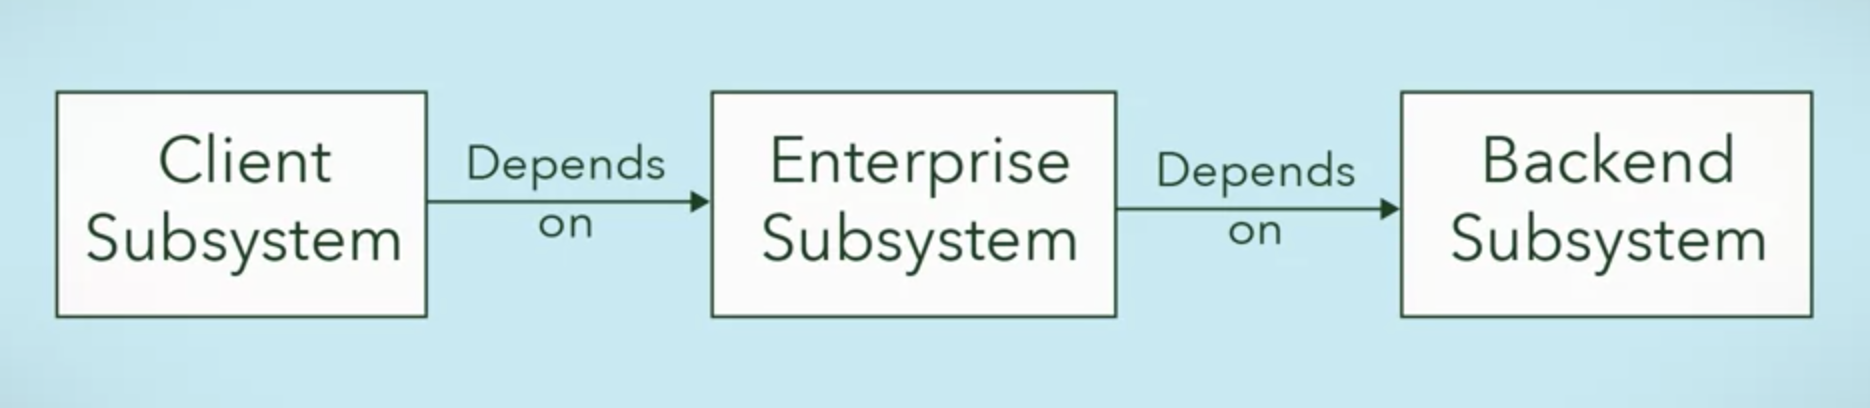
    - High
    - 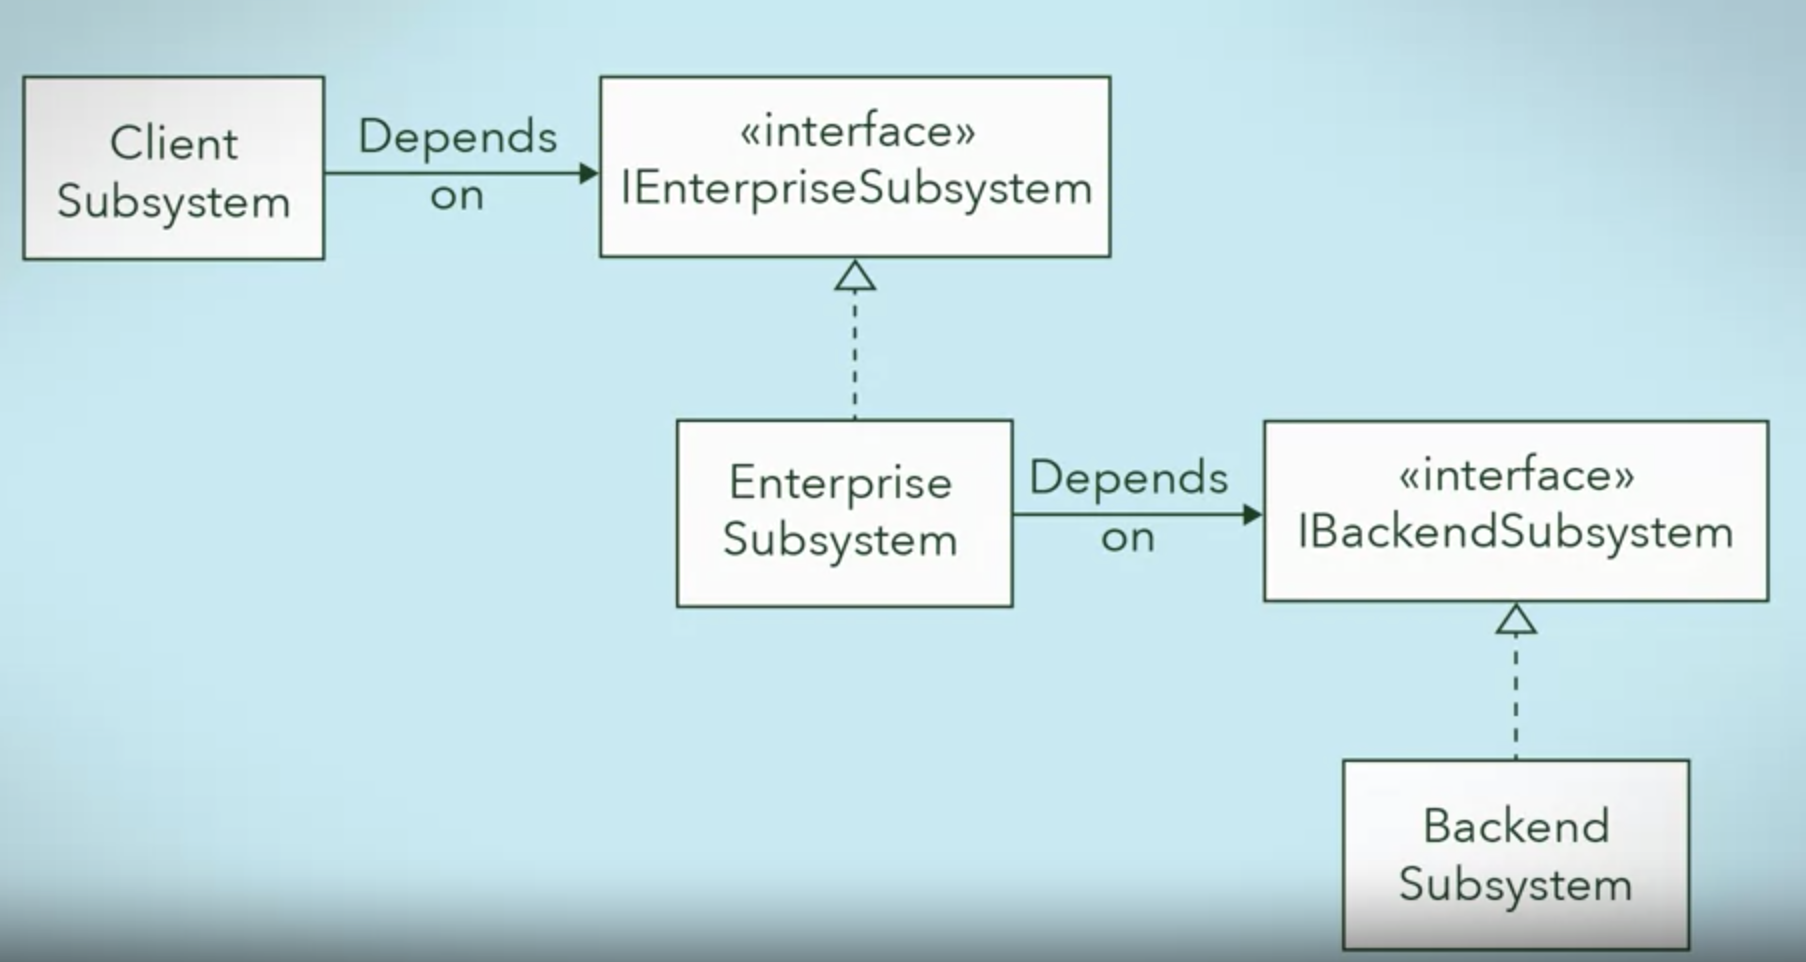

In [ ]:
'''
This is considered a low level dependency, because you need to implement the right method (i.e. merge_sort(), 
bubble_sort()) for your client class to work. So any changes to the sorter class will break downstream code
'''

class MergeSort:
    def merge_sort(self):
        ...

class BubbleSort:
    def bubble_sort(self):
        ...

class Client:
    def __init__(self, some_sorter):
        self.sorter = some_sorter

    def do_work(self):
        self.sorter.merge_sort()

In [ ]:
'''
Compare the above to this, where we implement a Sorter base class, with an abstractmethod `sort`.
Now, all the client needs to do is to demand that whatever sorter it gets does the sorting job, without worrying
about the exact method name or implementation of the sorting.
'''
from abc import ABCMeta, abstractmethod

class Sorter(metaclass=ABCMeta):
    @abstractmethod
    def sort(self):
        ...

class MergeSort(Sorter):
    def sort(self):
        ...

class BubbleSort(Sorter):
    def sort(self):
        ...

class Client:
    def __init__(self, some_sorter: Sorter):
        self.sorter = some_sorter

    def do_work(self):
        self.sorter.sort()

## Composing Objects Principle

- Design principles mainly try to minimize coupling in any system you design, which basically allows you to add/modify your code base with minimal breakage

- So far, we've used generalisation, abstraction, polymorphism to do this

- While inheritance is great for reusing code, it forces coupling of code
    - Because subclass gains access to all knowledge and access to all superclass' attributes and methods (so long as not private)
    - So suppose you have multiple levels of inheritance. If a subclass can modify attributes of the superclass, you can end up messing up the code

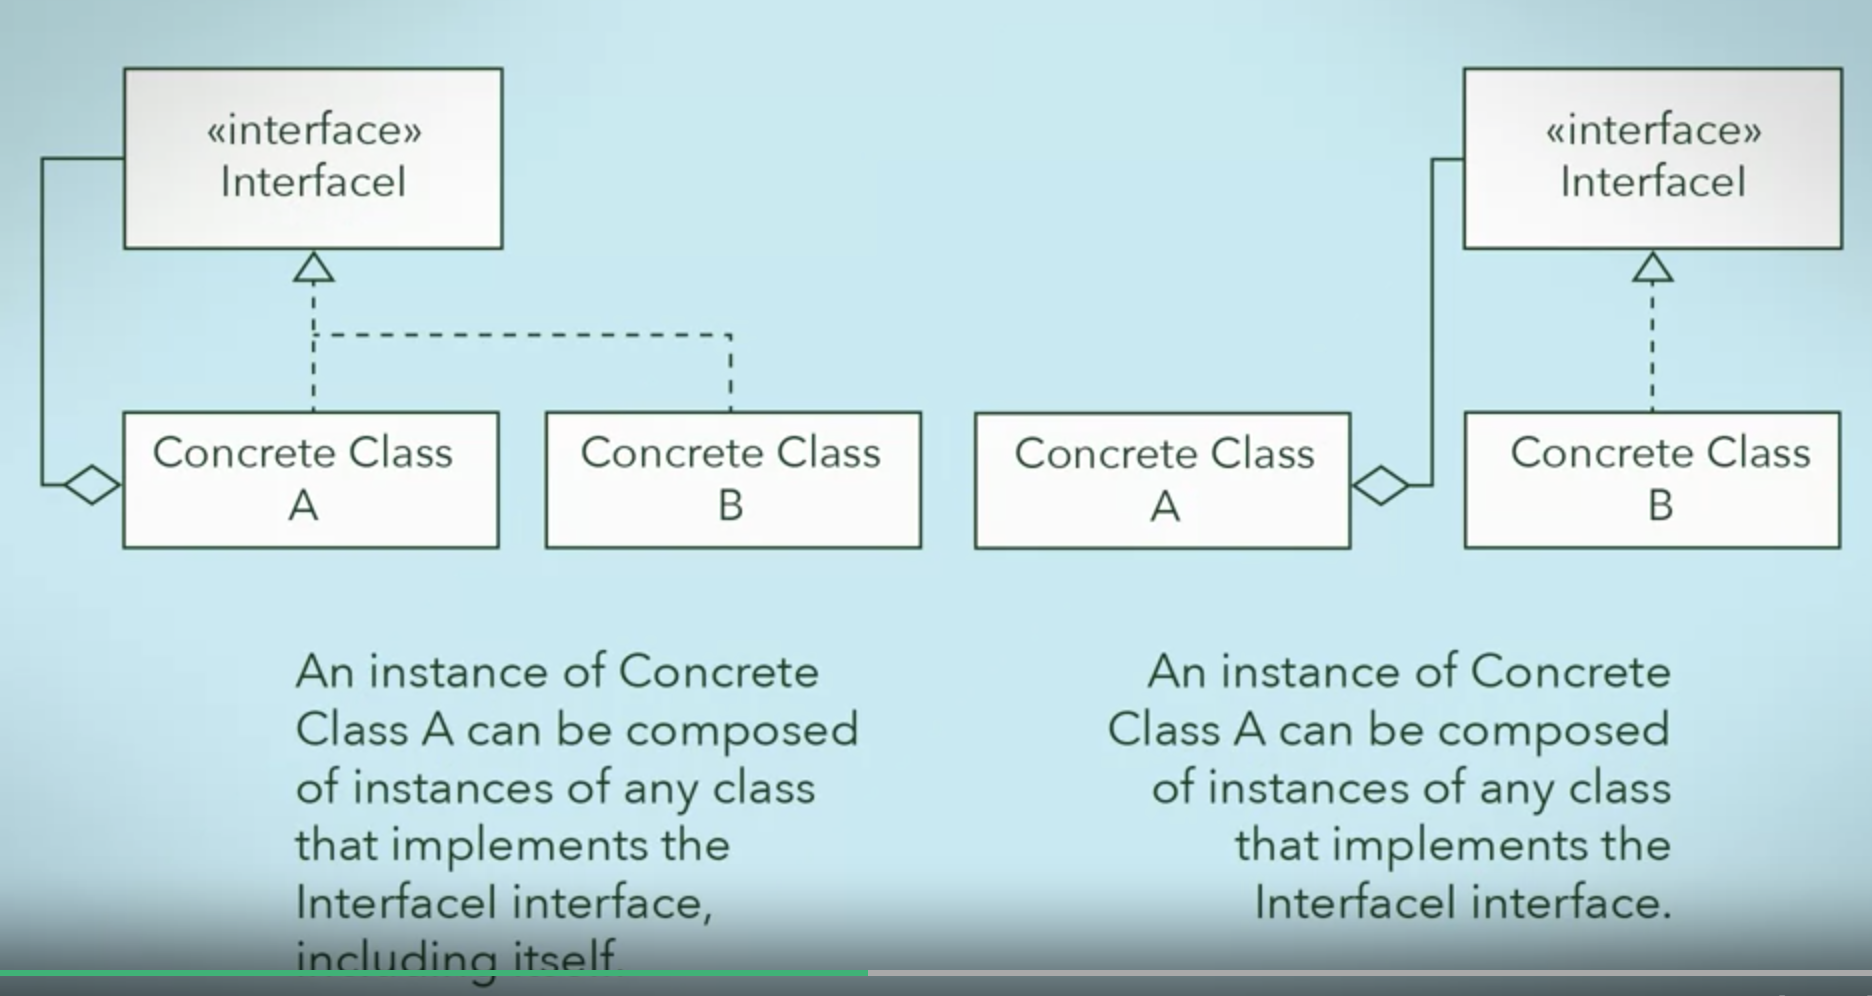

- To avoid this, we can use aggregation (composition) instead of inheritance (e.g. composite design pattern, decorator design pattern)
    - So the overall behaviour comes from the composed sum of the individual object, and the object can reuse and aggregate another object to delegate requests
    - Composed classes do not share attributes or implementations of behaviours, hence are more independent

- Upsides of Composition: Flexibility
    - It does not force you to find similarities between two classes, so classes can work together without anything shared between them. This prevents having to debug some extended chain of things breaking if anything changes
    - You can also build a new object through composition dynamically at run-time, while in inheritance, the behaviour of any class is already fixed at run time.

- Downsides of composition: 
    - In composition you have to provide implementations for all behaviour, because you don't share code
    - In inheritance, you need to provide each subclass with their own implementation of a shared behaviour

## Interface Segragation Principle

- Many design patterns so far use generalisation of concrete classes as interfaces, which allows you to indirectly invoke behaviour of concrete classes

- However, it is also possible to go too far and end up with too much information in the interface
    - Example:
        - In a supermarket, you can pay for groceries by going to the cashier, or by going to a self-serve machine
        - You can generalise the behaviour of both `Cashier` and `SelfServeMachine` into some interface; they both `scan_items()`, `accept_payment()` and `dispense_change()`.
        - But, `Cashier` must also `eat()`, have `break()`, and `end_shift()`
        - So what do we do?
            - If you add these into your interface, then you need to implement it in your `SelfServeMachine` even though it doesn't need to do these things
            - If you leave it in `Cashier`, then you have low level dependency, because your client class must invoke the methods in the concrete class

- This is where the interface segregation principle comes in
    - Any classes that implement an interface should not hae dummy implementations of any methods defined in the interface
    - To cope with this, you should split large interfaces into smaller generalisations!

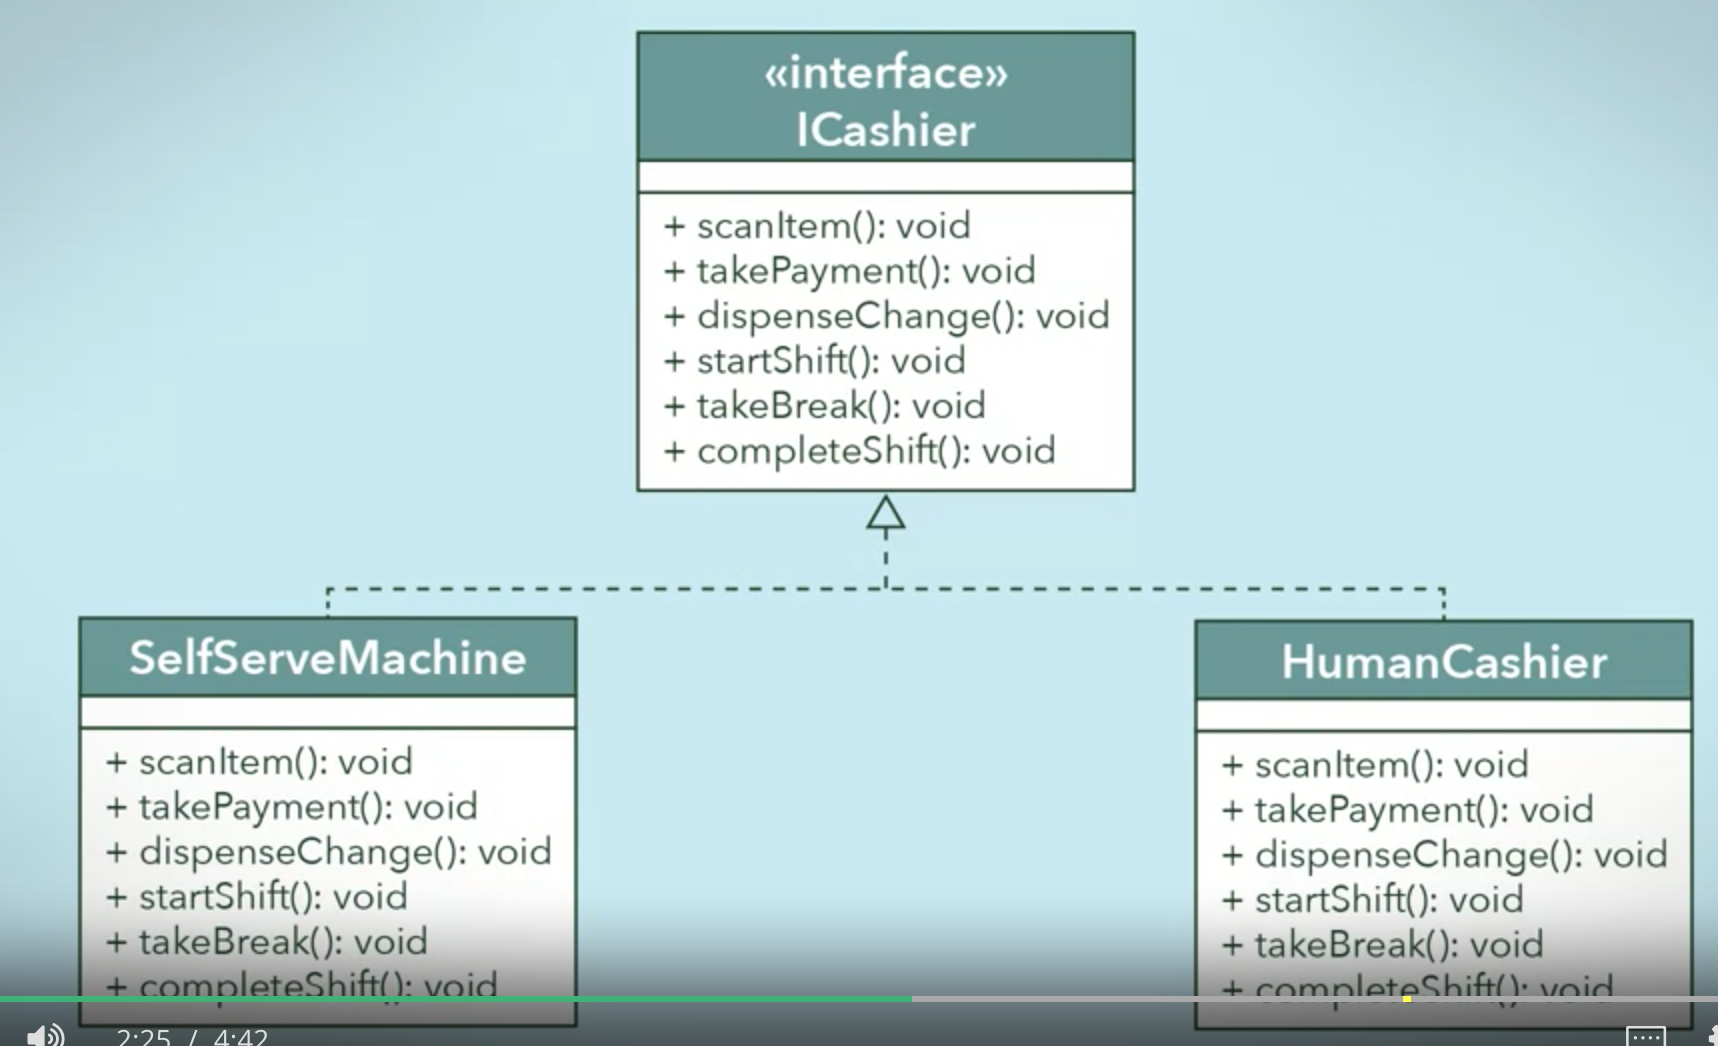

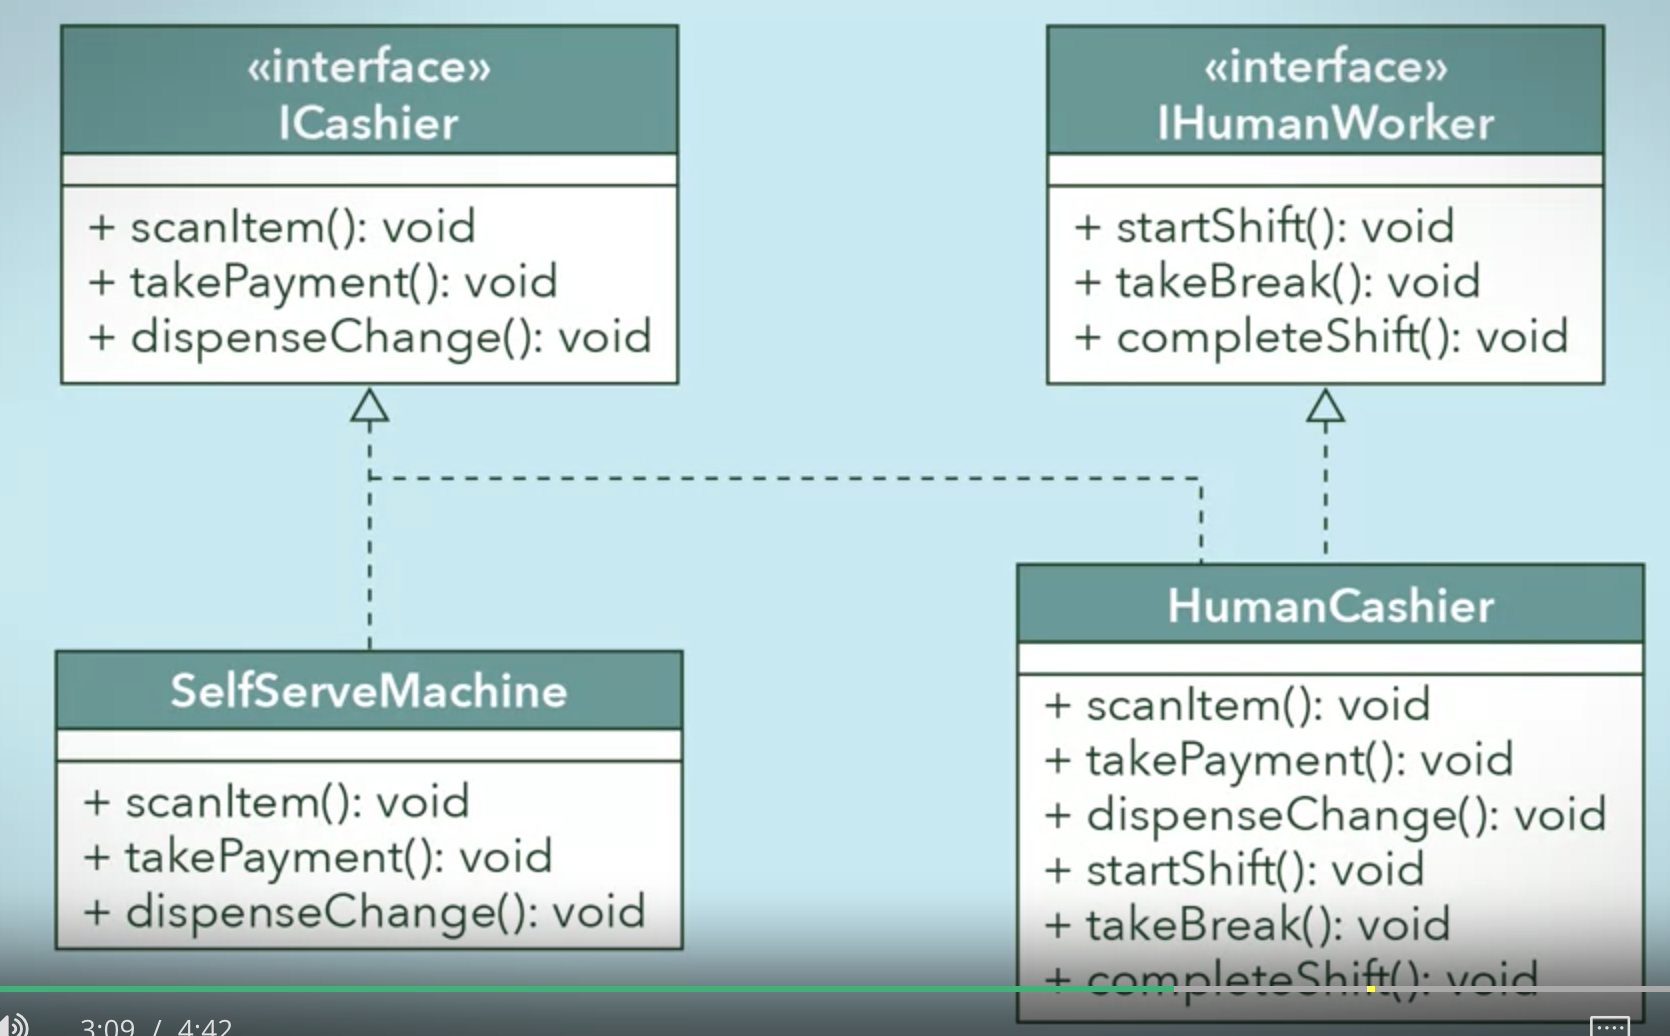

- Instead of having a single interface for `Cashier`, you should have 2 interfaces, `Cashier` and `HumanCashier`.
    - `Cashier` will define the methods that is common to both machine and human cashiers
    - `HumanCashier` will implement some methods that are unique to human cashiers
- This way, both of your concrete classes will only provide implementations that generalize their specific functionality

## Principle of Least Knowledge

- When you design classes, they should have the minimum amount of knowledge about other classes in the system. Else, this can lead to coupling of classes which makes systems difficult to maintain

- Also realised in the rule `Law of Demeter`: classes should know about and interact with as few other classes as possible
    - Rule 1: A method M in object O can call any method in O
    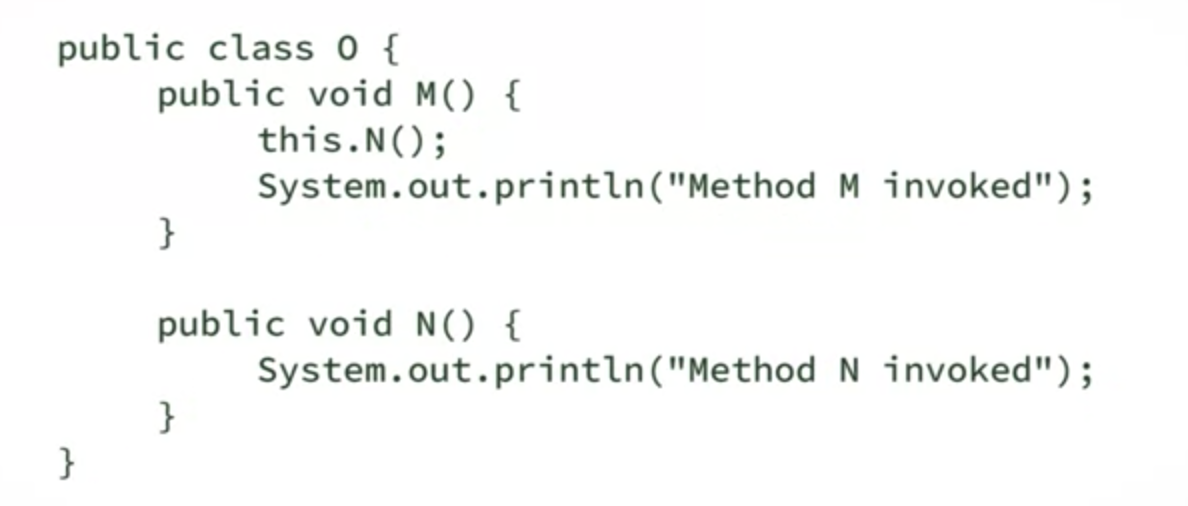
    - Rule 2: A method M in object O can call methods of any parameter P
    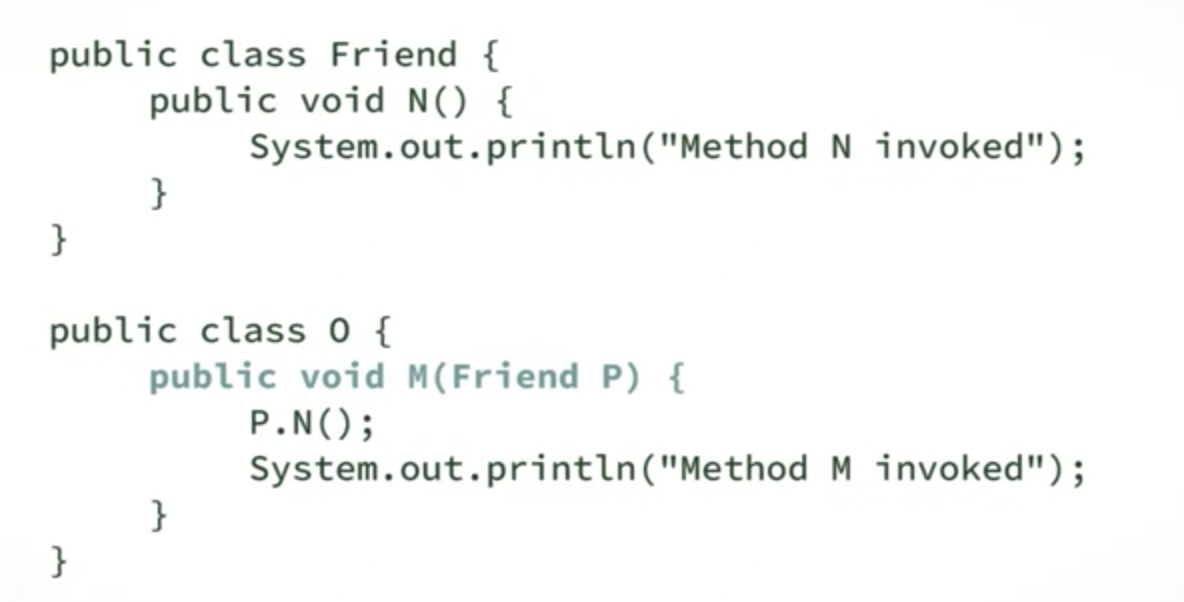
    - Rule 3: A method M in object O can call method N for any object I if I is instantiated within M
    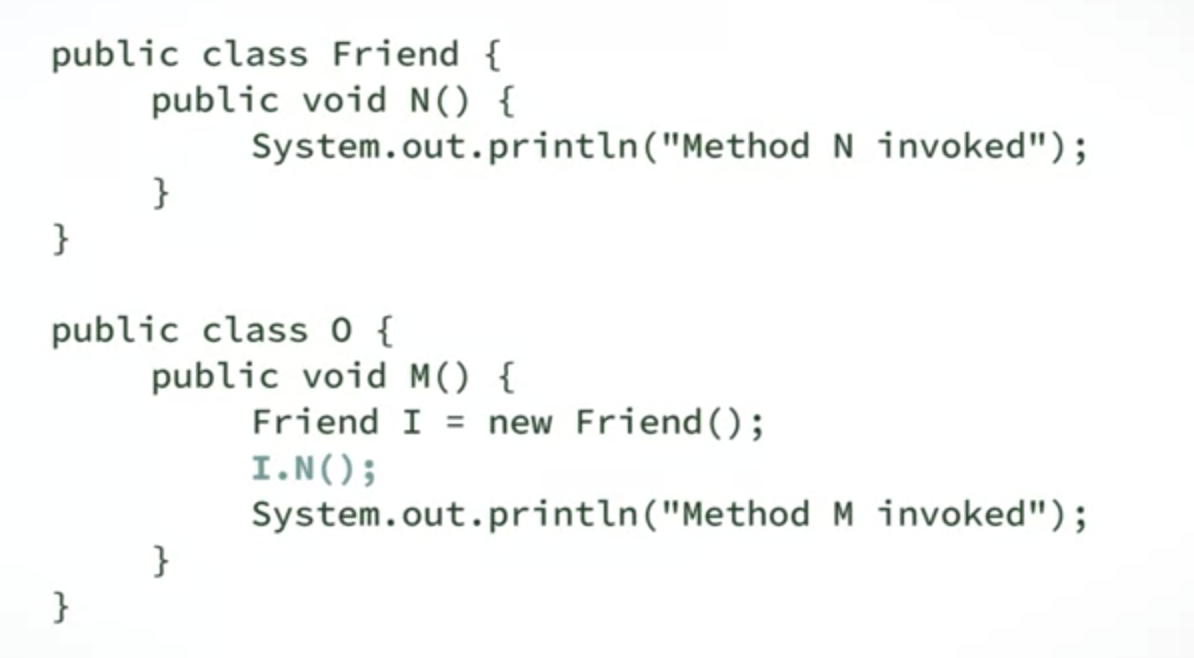
    - Rule 4: A method M in object O can invoke methods of any object that is a direct component of O
    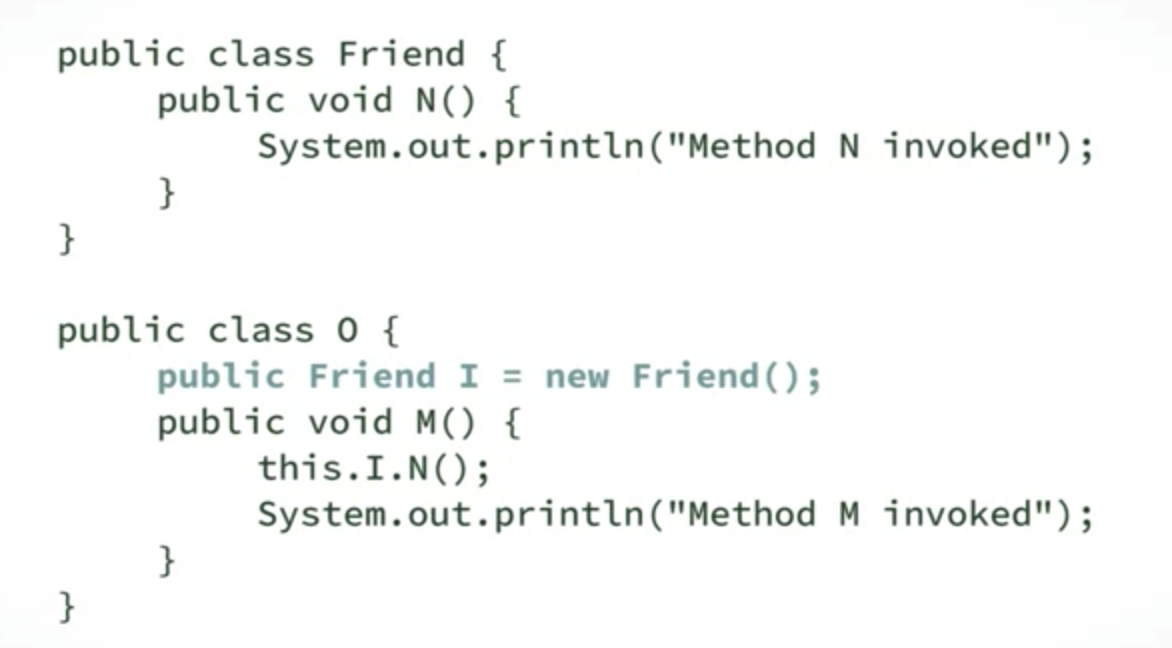

    - Law of Demeter is often violated in one of two ways:
        - When you try to allow a method to access another method by reaching through an object that is not local
            - For example, a driver interacts with a car, and a car contains an engine. In ideal design, a driver should not interact with the engine
            - So the law is violated if I do something like `car.engine.spark_pistons()` in the driver class
            
        - Another way the law is violated is when you use a return object that the class should not know about. 
            - Return objects should be of the same type as those declared in parameter, or instantiated in the method or class
            - 
- 